In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def preprocess_data(df):
    # Drop rows with missing values
    cleaned_data = df.dropna()

    # Drop duplicates
    cleaned_data = cleaned_data.drop_duplicates()

    le = LabelEncoder()
    cleaned_data["gender"] = le.fit_transform(cleaned_data["gender"])
    cleaned_data["backlogs"] = le.fit_transform(cleaned_data["backlogs"])
    cleaned_data["sleep"] = le.fit_transform(cleaned_data["sleep"])
    cleaned_data["concentration"] = le.fit_transform(cleaned_data["concentration"])
    cleaned_data["age"] = le.fit_transform(cleaned_data["age"])
    cleaned_data["academic_level"] = le.fit_transform(cleaned_data["academic_level"])
    cleaned_data["currently_satisfied"] = le.fit_transform(cleaned_data["currently_satisfied"])
    cleaned_data["info_delivery"] = le.fit_transform(cleaned_data["info_delivery"])
    cleaned_data["learning_strategy"] = le.fit_transform(cleaned_data["learning_strategy"])
    cleaned_data["mental_activities"] = le.fit_transform(cleaned_data["mental_activities"])
    cleaned_data["study_time"] = le.fit_transform(cleaned_data["study_time"])
    cleaned_data["grades"] = le.fit_transform(cleaned_data["grades"])
    cleaned_data["absent_days"] = le.fit_transform(cleaned_data["absent_days"])
    cleaned_data["time"] = le.fit_transform(cleaned_data["time"])

    X = cleaned_data.drop(columns=['learning_strategy'])  # Features
    y = cleaned_data['learning_strategy']  # Target variable


    # Scale numerical features
    scaler = StandardScaler(with_mean=False)
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def train_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    rounded_ypred = np.round(y_pred)
    print(rounded_ypred)

    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)


# Load your data
df = pd.read_csv("C:/Users/fathi/Desktop/MINI PROJECT/newData2.csv")

# Preprocess the data
X, y = preprocess_data(df)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
evaluate_model(model, X_test, y_test)


C:\Users\fathi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2.]
Mean Absolute Error (MAE): 1.0375149026116002
Mean Squared Error (MSE): 1.507207604247145
Root Mean Squared Error (RMSE): 1.2276838372509207


In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
# Calculate the R² score using the correct actual outcomes y_test
r_squared = r2_score(y_test, y_pred)

print("R² Score: {:.2f}".format(r_squared))


R² Score: -0.61


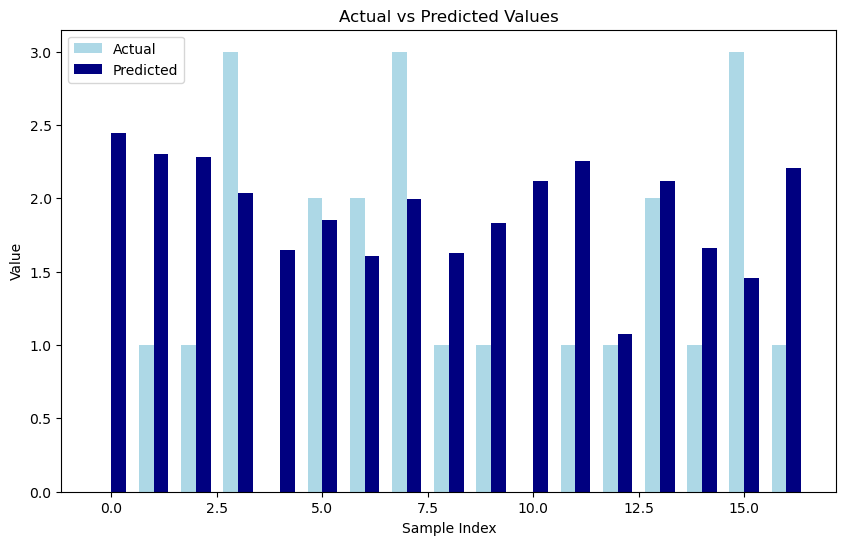

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define bar width
bar_width = 0.35

# Plot actual vs predicted values using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(y_test)) - bar_width/2, y_test, bar_width, label='Actual', color='lightblue')
plt.bar(np.arange(len(y_test)) + bar_width/2, y_pred, bar_width, label='Predicted', color='navy')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
